# Importing necessray modules

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Getting required data

In [2]:
#Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [6]:
test_labels[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# Keeping data tidy

In [56]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## A quick peek at the training data

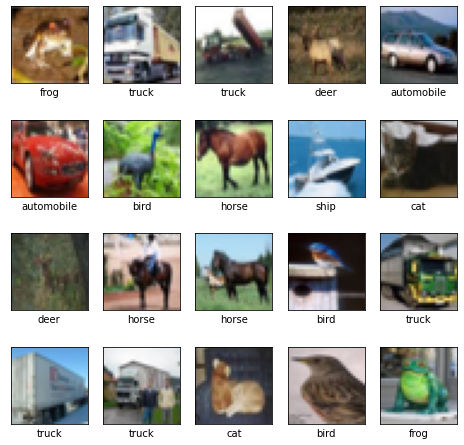

In [48]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
#To verify that the dataset looks correct, let's plot the first 20 images from the training set along with their names
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Designing the model

In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(70, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(70, (3, 3), activation='relu'))
#outputs were flattened into vectors of shape (1024) before going through two Dense layers.
model.add(layers.Flatten())
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(10))

In [50]:
#Here's the complete architecture of our model.
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 70)        20230     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 70)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 70)          44170     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1120)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)              

# Training the model

In [51]:
#Compile defines the loss function, the optimizer and the metrics.
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#The Model.fit method adjusts the model parameters to minimize the loss
model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.5132 - accuracy: 0.4502 - val_loss: 1.2418 - val_accuracy: 0.5577
Epoch 2/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1374 - accuracy: 0.5981 - val_loss: 1.0417 - val_accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9811 - accuracy: 0.6574 - val_loss: 1.0279 - val_accuracy: 0.6389
Epoch 4/10
1563/1563 [==============================] - 93s 59ms/step - loss: 0.8724 - accuracy: 0.6927 - val_loss: 0.9413 - val_accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.7884 - accuracy: 0.7224 - val_loss: 0.8607 - val_accuracy: 0.6958
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7285 - accuracy: 0.7464 - val_loss: 0.8691 - val_accuracy: 0.7016
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6752 - accuracy: 0.7612 - val_loss: 0.8840 -

# Evaluating the model

In [52]:
#The Model.evaluate method checks the models performance on our test set
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - loss: 0.9334 - accuracy: 0.6928


### Plotting the graph

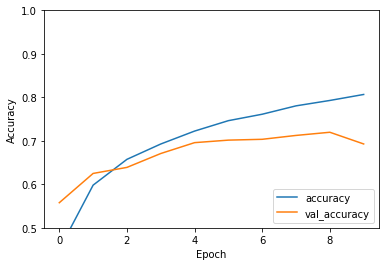

In [53]:
#plotting the accuracy of our model w.r.t the number of epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### Predicting the results

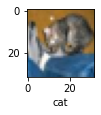

Model prediction: 3
Test result: [3]


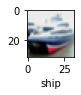

Model prediction: 8
Test result: [8]


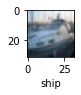

Model prediction: 8
Test result: [8]


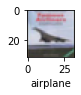

Model prediction: 0
Test result: [0]


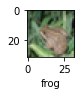

Model prediction: 6
Test result: [6]


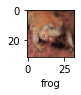

Model prediction: 6
Test result: [6]


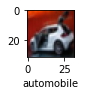

Model prediction: 1
Test result: [1]


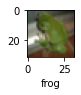

Model prediction: 6
Test result: [6]


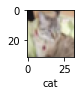

Model prediction: 3
Test result: [3]


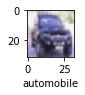

Model prediction: 1
Test result: [1]


In [55]:
#finding the probability for each test_example
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

#Plotting the test images along with the predicted result and the actual result
plt.figure(figsize=(7,7))
for i in range(10):
    plt.subplot(4,5,i+1)
    plt.imshow(np.reshape(test_images[i], [32, 32,3]), cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i][0]])
    plt.show()
    print("Model prediction:",tf.math.argmax(probability_model(test_images),1)[i].numpy())
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    print("Test result:",test_labels[i])
